In [ ]:
# pip install networkx

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import functools
import matplotlib.pyplot as plt 
import numpy as np
from networkx.algorithms.community.community_utils import is_partition

# TUBES 1

**MEMBUAT GRAPH**

In [ ]:
pdEdgeList = pd.read_csv(r'/content/drive/My Drive/dataset final project vaksin - dataset sna.csv')
pdEdgeList

,Source,Target,Type,Id,Weight
0,#vaksin,Apa Perbedaan #vaksin China Sinovac dan Sinoph...,Directed,0,1
1,#vaksinasi,Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasi...,Directed,1,1
2,#COVID19,"Kabar Duka, Dokter Pribadi Paus Fransiskus Men...",Directed,2,1
3,#COVID19,#vaksinasi Argumen Pentingnya Negara Mewajibkan,Directed,3,1
4,#vaksin,Top News Koran Rakyat Merdeka Jelang Imlek Chi...,Directed,4,1
...,...,...,...,...,...
143,#COVID19,Bagaimana keadaan Presiden Joko Widodo malam i...,Directed,145,1
144,#COVID19,BPOM Resmi Keluarkan EUA Untuk Vaksin Sinovac ...,Directed,146,1
145,#COVID19,Calon Penumpang Kapal di Ternate Maluku Utara ...,Directed,147,1
146,#COVID19,Kebijakan Inggris memperlambat pemberian dosis...,Directed,148,1


In [ ]:
len(pdEdgeList)

148

In [ ]:
gpd = nx.Graph()
for i in range(0,len(pdEdgeList)):
  gpd.add_edge(pdEdgeList['Target'].loc[i],pdEdgeList['Source'].loc[i])

In [ ]:
#menambahkan edgelist ke dalam graph
for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])

In [ ]:
#function untuk menghitung degree dari graph
def calculate_degree(gpd,n = 0):
    fmdegree = []
    fmNode= []
    for node in gpd.nodes():
        tempD = gpd.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
    return fmdegree,fmNode

In [ ]:
gpdDegree, gpdNode = calculate_degree(gpd,0)

In [ ]:
#maximun & minumum degree dari node
print('Maximum Degree of the node in this network :', max(gpdDegree))
print('Manimum Degree of the node in this network :', min(gpdDegree))

Maximum Degree of the node in this network : 57
Manimum Degree of the node in this network : 1


**MENGCONVERT NODE DAN DEGREE KE DALAM DATAFRAME**

In [ ]:
data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head()

,Node,Degree
0,Apa Perbedaan #vaksin China Sinovac dan Sinoph...,1
1,#vaksin,37
2,Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasi...,1
3,#vaksinasi,36
4,"Kabar Duka, Dokter Pribadi Paus Fransiskus Men...",1


**TOP 5 DENGAN DEGREE TERTINGGI**

In [ ]:
df_NodeDegree.sort_values(by=['Degree'], inplace=True, ascending=False)
df_NodeDegree.head()

,Node,Degree
5,#COVID19,57
1,#vaksin,37
3,#vaksinasi,36
58,#vaksin Raffi Ahmad Lagi kata Dokternya Halal ...,3
87,#vaksinasi Presiden Jokowi Bakal Divaksin Lagi...,2


VISUALISASI NETWORK

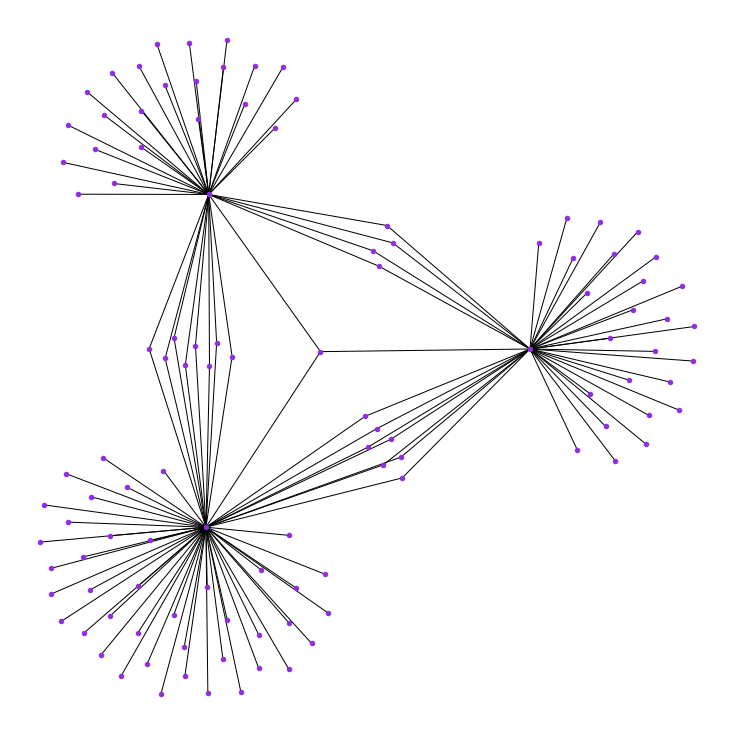

In [ ]:
fig = plt.figure(figsize=(10, 10)) 
nx.draw(gpd, node_size=20,node_color='#8E2DE2')
plt.show()

MENCARI NILAI DEGREE DARI PENGGUNA YANG PALING BERPENGARUH

In [ ]:
dc = nx.degree_centrality(gpd)
dc

{'#COVID19': 0.5135135135135135,
 '#vaksin': 0.3333333333333333,
 '#vaksin COVAX akan tersedia kuartal kedua 2021 https://t.co/mZNXC9AiYz ': 0.009009009009009009,
 '#vaksin Dokter Tirta Akan Disuntik Besok di Sleman https://t.co/jaTsFm2l3k': 0.009009009009009009,
 '#vaksin Indonesia Terparah Di ASEAN https://t.co/XLEMxHTycW': 0.009009009009009009,
 '#vaksin Jangan ragu untuk itu yaa': 0.009009009009009009,
 '#vaksin Kata Menkes, Vaksinasi Upaya Melindungi Diri Sendiri Sekaligus Umat Manusia https://t.co/nCHCtIyqUt': 0.009009009009009009,
 '#vaksin Menteri Kesehatan harap 70 persen masyarakat Indonesia ikut': 0.009009009009009009,
 '#vaksin Raffi Ahmad Lagi kata Dokternya Halal 1 di Indonesia': 0.02702702702702703,
 '#vaksin Selesaikan Pandemi, Menteri Sandi Ajak Insan Pariwisata Ikut https://t.co/Pdgbh2Swhk': 0.018018018018018018,
 '#vaksin Setelah Jokowi, Diteruskan ke Seluruh Provinsi dan Kabupaten/Kota https://t.co/Oo84Hdbvpb': 0.009009009009009009,
 '#vaksin Tangan Dokter Gemetar S

In [ ]:
dc = nx.degree_centrality(gpd)
max_dc = max(list(dc.values()))
print(max_dc)

0.5135135135135135


# TUBES 2

In [ ]:
def degree_centrality(gpd):
    if len(gpd) <= 1:
        return {n: 1 for n in gpd}

    s = 1.0 / (len(gpd) - 1.0)
    centrality = {n: d * s for n, d in gpd.degree()}
    return centrality

In [ ]:
# Untuk memukan nilai modular maksimum dari node, dan mengeluarkan nilai modular dari node yang dipilih

def modularity(gpd, communities, weight="weight"):

    directed = gpd.is_directed()
    if directed:
        out_degree = dict(gpd.out_degree(weight=weight))
        in_degree = dict(gpd.in_degree(weight=weight))
        m = sum(out_degree.values())
        norm = 1 / m ** 2
    else:
        out_degree = in_degree = dict(gpd.degree(weight=weight))
        deg_sum = sum(out_degree.values())
        m = deg_sum / 2
        norm = 1 / deg_sum ** 2

    def community_contribution(community):
        comm = set(community)
        L_c = sum(wt for u, v, wt in gpd.edges(comm, data=weight, default=1) if v in comm)

        out_degree_sum = sum(out_degree[u] for u in comm)
        in_degree_sum = sum(in_degree[u] for u in comm) if directed else out_degree_sum

        return L_c / m - out_degree_sum * in_degree_sum * norm

    return sum(map(community_contribution, communities))

In [ ]:
# Membangun komunitas daring berdasarkan nilai modular yang didapat dari keluarn berupa daftar node data yang dikelompokkan dalam komunitas

def naive_greedy_modularity_communities(gpd):

    communities = list([frozenset([u]) for u in gpd.nodes()])
    merges = []
    old_modularity = None
    new_modularity = modularity(gpd, communities)
    while old_modularity is None or new_modularity > old_modularity:
        old_modularity = new_modularity
        trial_communities = list(communities)
        to_merge = None
        for i, u in enumerate(communities):
            for j, v in enumerate(communities):
                if j <= i or len(u) == 0 or len(v) == 0:
                    continue
                trial_communities[j] = u | v
                trial_communities[i] = frozenset([])
                #proses penerapan phase 1 perhitungan modularity pada tiap node
                trial_modularity = modularity(gpd, trial_communities)
                if trial_modularity >= new_modularity:
                    if trial_modularity > new_modularity:
                        new_modularity = trial_modularity
                        to_merge = (i, j, new_modularity - old_modularity)
                    elif to_merge and min(i, j) < min(to_merge[0], to_merge[1]):
                        new_modularity = trial_modularity
                        to_merge = (i, j, new_modularity - old_modularity)
                trial_communities[i] = u
                trial_communities[j] = v
        if to_merge is not None:
            merges.append(to_merge)
            i, j, dq = to_merge
            u, v = communities[i], communities[j]
            communities[j] = u | v
            communities[i] = frozenset([])

    communities = [c for c in communities if len(c) > 0]
    
    return communities

In [ ]:
komunitas = naive_greedy_modularity_communities(gpd)
komunitas = list(komunitas)
komunitas

[frozenset({'#vaksin',
            '#vaksin COVAX akan tersedia kuartal kedua 2021 https://t.co/mZNXC9AiYz ',
            '#vaksin Dokter Tirta Akan Disuntik Besok di Sleman https://t.co/jaTsFm2l3k',
            '#vaksin Jangan ragu untuk itu yaa',
            '#vaksin Kata Menkes, Vaksinasi Upaya Melindungi Diri Sendiri Sekaligus Umat Manusia https://t.co/nCHCtIyqUt',
            '#vaksin Menteri Kesehatan harap 70 persen masyarakat Indonesia ikut',
            '#vaksin Raffi Ahmad Lagi kata Dokternya Halal 1 di Indonesia',
            '#vaksin Tangan Dokter Gemetar Suntikan, Jokowi: Mungkin juga yang Disuntik Presiden https://t.co/rxXgaPjgZv',
            '#vaksin apa yg paling manjur vaksin',
            '#vaksin di Indonesia diundur hingga februari mendatang',
            '#vaksin di Jakarta Ditunda Jumat 15 Januari',
            '#vaksin presiden jokowi hingga dokter gemetar',
            '#vaksinasi Jokowi Divaksin, Begini Beragam Respons Netizen',
            'Alasan Darurat, BP

In [ ]:
# Panjang komunitas 
len(komunitas)

3

In [ ]:
# Penggabungan antara node dan komunitasnnya
list_komunitas = []
for i in range(0,len(komunitas)):
  for j in range(0,len(komunitas[i])):
    temp = [list(komunitas[i])[j],i]
    list_komunitas.append(temp)

In [ ]:
#memberi warna pada graph untuk setiap komunitas yang terbentuk
color = []
for i in range(0,len(list(list_komunitas))):
  color.append(np.random.rand(3,))

In [ ]:
#untuk mengecek dan menberikan warna pada setiap komunitas yang terbentuk
def warna(node):
  for i in range(0,len(list_komunitas)):
    if node == list_komunitas[i][0]:
      cek = color[list_komunitas[i][1]]
      break
  return cek

In [ ]:
#memberikan warna pada tiap node berdasarkan komunitas yang terbentuk
color_map = []
for node in gpd:
  color_map.append(warna(node))

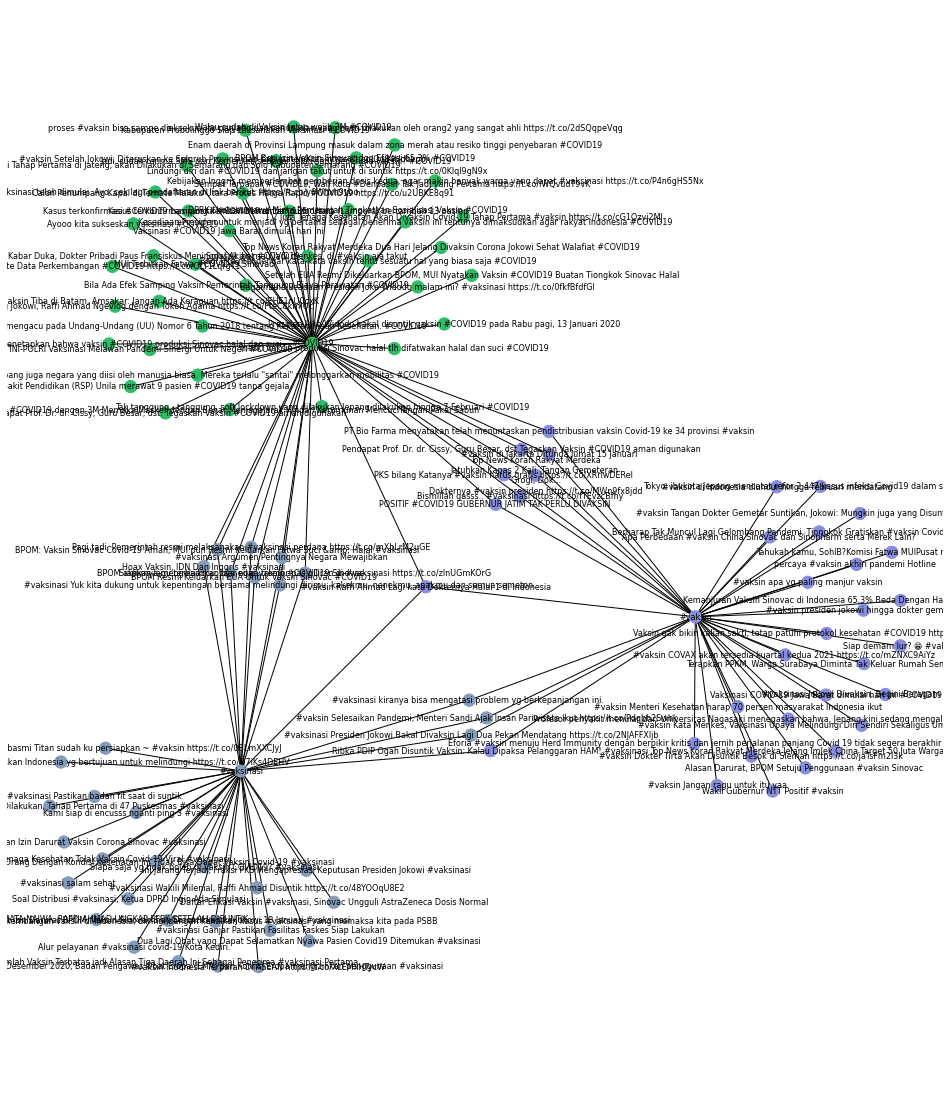

In [ ]:
#menampilkan vsualisasi dari komunitas yang terbentuk
fig = plt.figure(figsize=(13, 15)) 
nx.draw(gpd, node_size=150,node_color=color_map,with_labels=True,font_size=8) 
plt.axis('equal') 
plt.show()